In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# Set the display options for horizontal scrolling
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:\Users\moham\Desktop\Loan Prediction\Train.csv")

# Copy to back-up file
data_BK = data.copy()

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [6]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 614
Number of columns: 13


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
Loan_Status_count = data.Loan_Status.value_counts()
print('Class 0:', Loan_Status_count[0])
print('Class 1:', Loan_Status_count[1])
print('Proportion:', round(Loan_Status_count[0] / Loan_Status_count[1], 2), ': 1')

Class 0: 422
Class 1: 192
Proportion: 2.2 : 1


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.isnull().sum() * 100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
# fill the missing values for numerical terms - mean
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [13]:
# fill the missing values for categorical terms - mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data.isnull().sum() * 100 / len(data)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [16]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
413,LP002332,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y
264,LP001872,Male,No,0,Graduate,Yes,5166,0.0,128.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
174,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,N


In [17]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [18]:
data['Dependents'] = data['Dependents'].replace(to_replace = "3+" , value = "4")

In [19]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
275,LP001900,Male,Yes,1,Graduate,No,2750,1842.0,115.0,360.0,1.0,Semiurban,Y
33,LP001098,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y
58,LP001198,Male,Yes,1,Graduate,No,8080,2250.0,180.0,360.0,1.0,Urban,Y


In [20]:
data['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

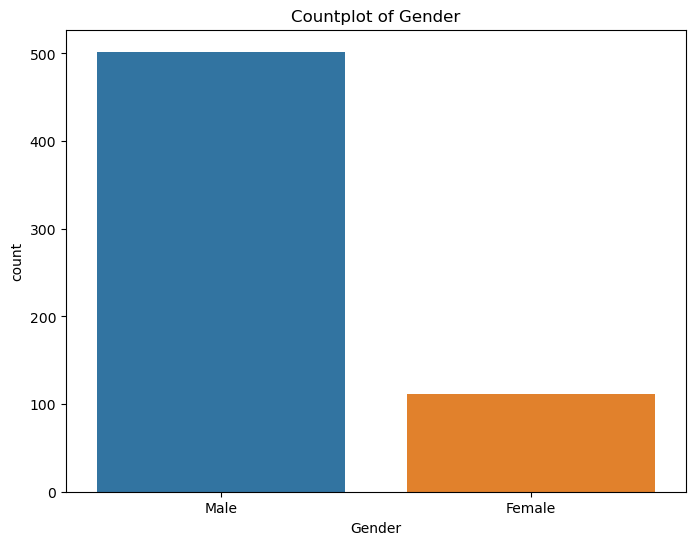

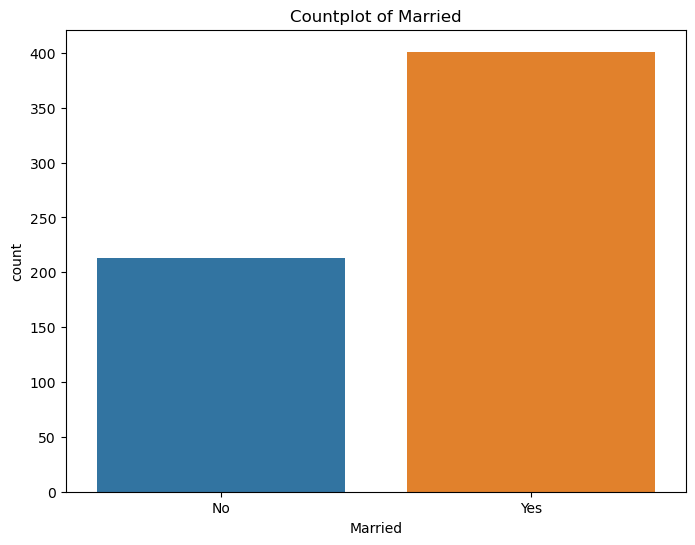

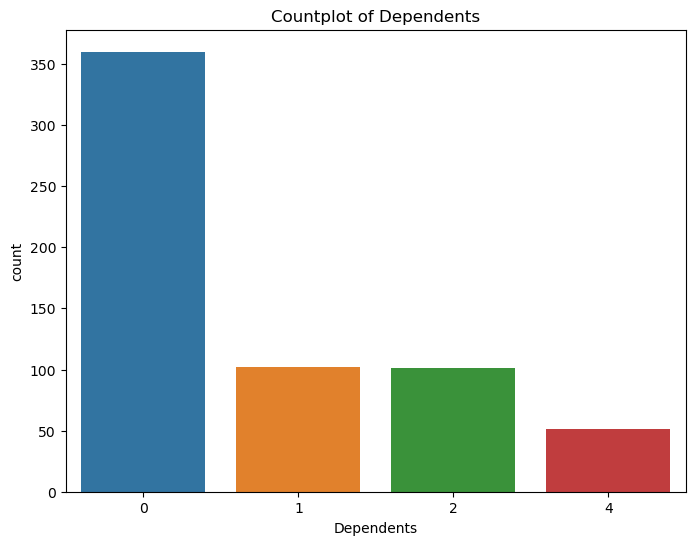

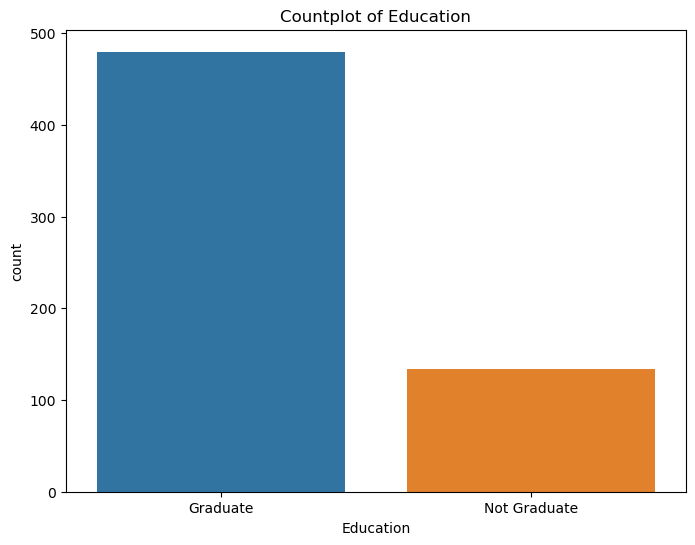

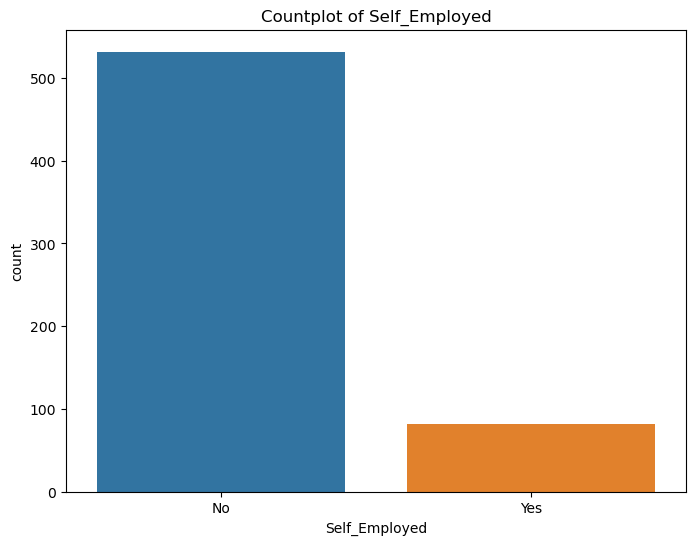

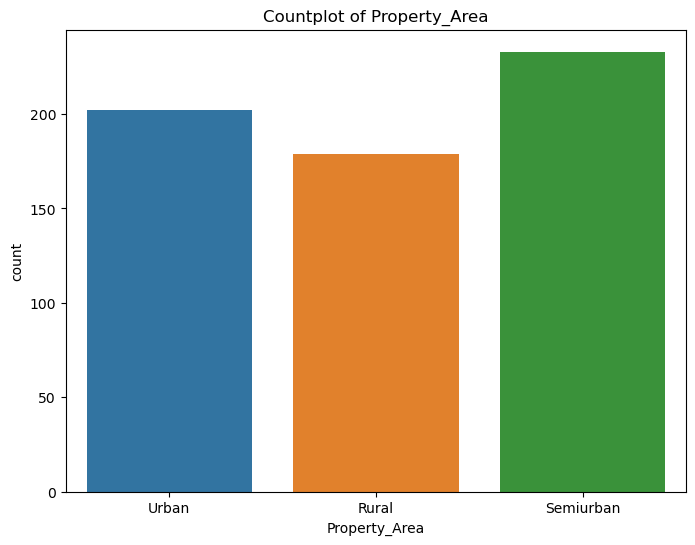

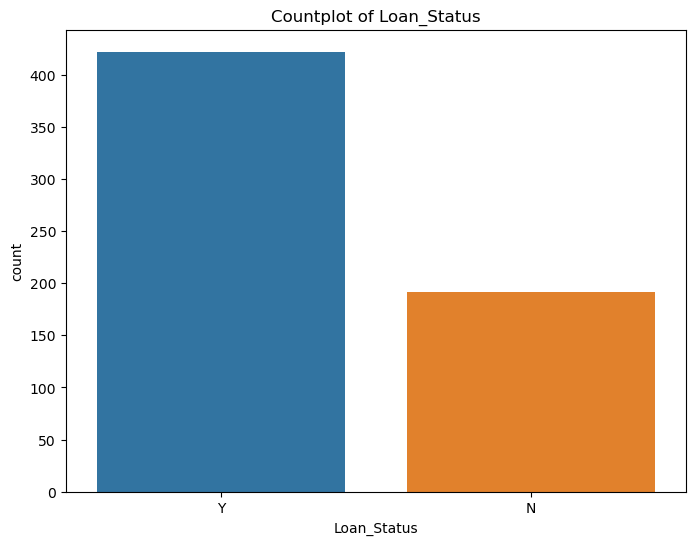

In [21]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in cols:
        plt.figure(figsize=(8, 6))  # Set the figure size
        sns.countplot(x=column, data=data)  # Plot the count
        plt.title("Countplot of " + column)  # Set the title
        plt.show()  # Show the plot

In [22]:
print(data["Gender"].unique())
print(data["Married"].unique())
print(data["Education"].unique())
print(data["Self_Employed"].unique())
print(data["Property_Area"].unique())
print(data["Loan_Status"].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [23]:
gender_mapping = {'Male': 1, 'Female': 0}
data["Gender"] = data["Gender"].map(gender_mapping).astype('int')

married_mapping = {'No': 0, 'Yes': 1}
data["Married"] = data["Married"].map(married_mapping).astype('int')

education_mapping = {'Not Graduate': 0, 'Graduate': 1}
data["Education"] = data["Education"].map(education_mapping).astype('int').astype('int').astype('int')

self_employed_mapping = {'No': 0, 'Yes': 1}
data["Self_Employed"] = data["Self_Employed"].map(self_employed_mapping).astype('int').astype('int')

property_area_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
data["Property_Area"] = data["Property_Area"].map(property_area_mapping).astype('int')

loan_status_mapping = {'N': 0, 'Y': 1}
data["Loan_Status"] = data["Loan_Status"].map(loan_status_mapping).astype('int')

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[cols] = scaler.fit_transform(data[cols])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,0.072991,-0.554487,0.000000,0.279851,1.0,2,1
1,LP001003,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.279851,1.0,0,0
2,LP001005,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.279851,1.0,2,1
3,LP001006,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.279851,1.0,2,1
4,LP001008,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.279851,1.0,2,1


In [27]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
data = data.drop('Loan_ID', axis = 1)
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 0.6)

X, y = over_sample.fit_resample(X,y)
print(X.shape)
print(y.shape)

(675, 11)
(675,)


In [29]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472, 11), (203, 11), (472,), (203,))

Model Name: LogisticRegression
Confusion matrix:
 [[128   4]
 [ 44  27]]


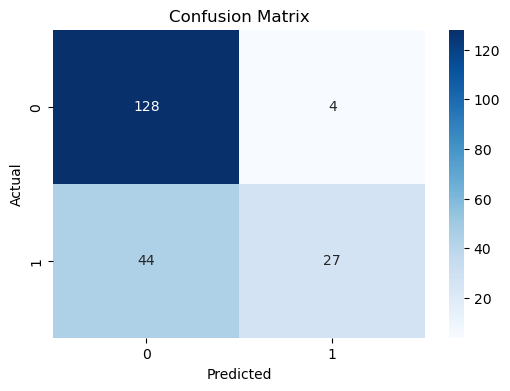

Outcome values:
 128 4 44 27
Classification report:
               precision    recall  f1-score   support

           1       0.74      0.97      0.84       132
           0       0.87      0.38      0.53        71

    accuracy                           0.76       203
   macro avg       0.81      0.67      0.69       203
weighted avg       0.79      0.76      0.73       203

Accuracy: 76.4 %
Precision: 74.4 %
Recall or Sensitivity: 97.0 %
Specificity: 38.0 %
F1 Score: 0.842
ROC AUC: 0.675


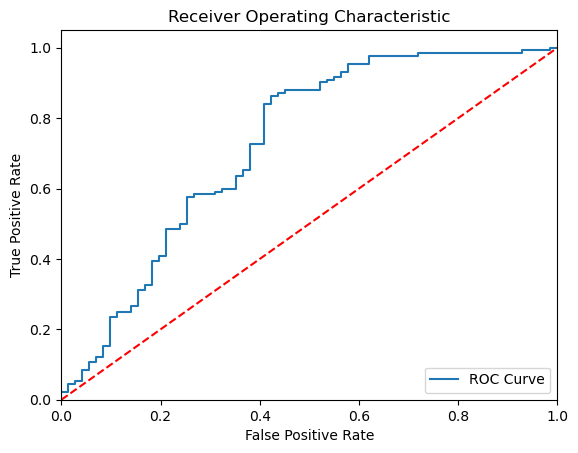

-----------------------------------------------------------------------------------------------------
Model Name: DecisionTreeClassifier
Confusion matrix:
 [[98 34]
 [27 44]]


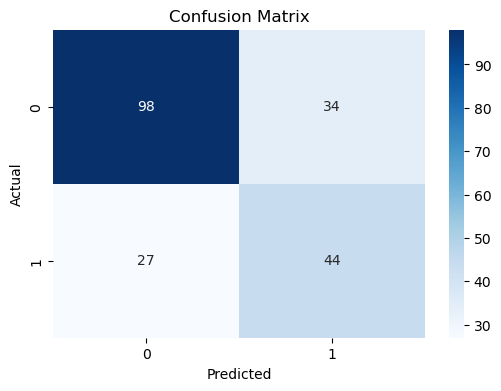

Outcome values:
 98 34 27 44
Classification report:
               precision    recall  f1-score   support

           1       0.78      0.74      0.76       132
           0       0.56      0.62      0.59        71

    accuracy                           0.70       203
   macro avg       0.67      0.68      0.68       203
weighted avg       0.71      0.70      0.70       203

Accuracy: 70.0 %
Precision: 78.4 %
Recall or Sensitivity: 74.2 %
Specificity: 62.0 %
F1 Score: 0.763
ROC AUC: 0.681


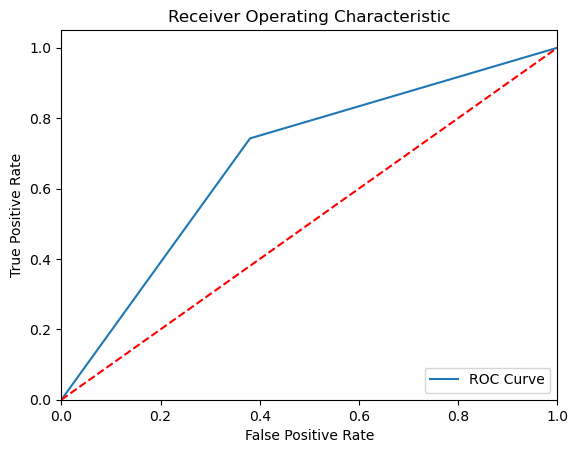

-----------------------------------------------------------------------------------------------------
Model Name: RandomForestClassifier
Confusion matrix:
 [[121  11]
 [ 29  42]]


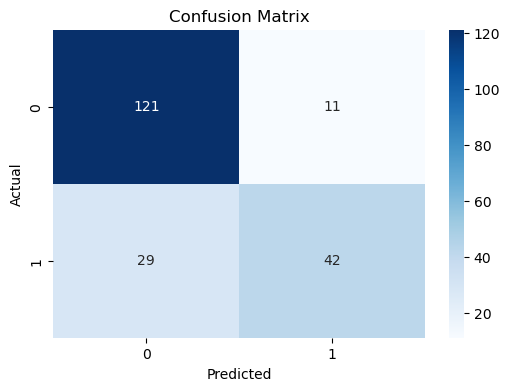

Outcome values:
 121 11 29 42
Classification report:
               precision    recall  f1-score   support

           1       0.81      0.92      0.86       132
           0       0.79      0.59      0.68        71

    accuracy                           0.80       203
   macro avg       0.80      0.75      0.77       203
weighted avg       0.80      0.80      0.79       203

Accuracy: 80.3 %
Precision: 80.7 %
Recall or Sensitivity: 91.7 %
Specificity: 59.2 %
F1 Score: 0.858
ROC AUC: 0.754


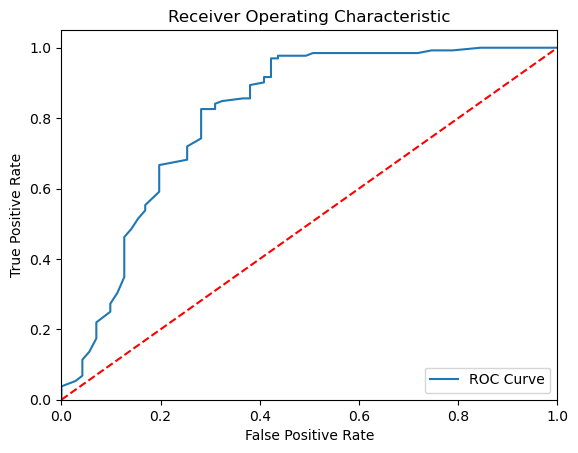

-----------------------------------------------------------------------------------------------------
Model Name: GaussianNB
Confusion matrix:
 [[127   5]
 [ 43  28]]


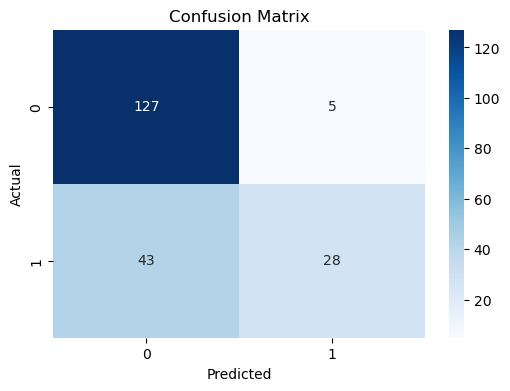

Outcome values:
 127 5 43 28
Classification report:
               precision    recall  f1-score   support

           1       0.75      0.96      0.84       132
           0       0.85      0.39      0.54        71

    accuracy                           0.76       203
   macro avg       0.80      0.68      0.69       203
weighted avg       0.78      0.76      0.74       203

Accuracy: 76.4 %
Precision: 74.7 %
Recall or Sensitivity: 96.2 %
Specificity: 39.4 %
F1 Score: 0.841
ROC AUC: 0.678


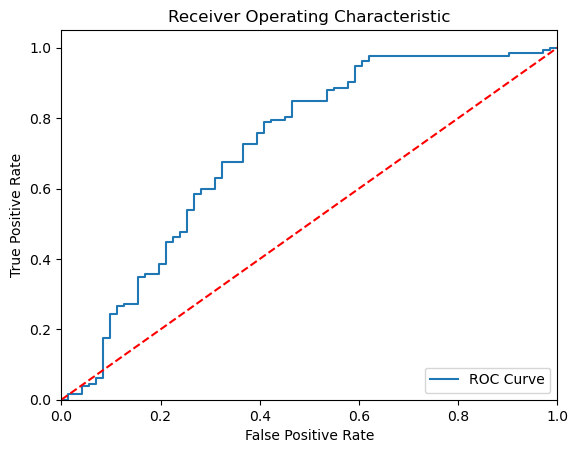

-----------------------------------------------------------------------------------------------------
Model Name: KNeighborsClassifier
Confusion matrix:
 [[120  12]
 [ 43  28]]


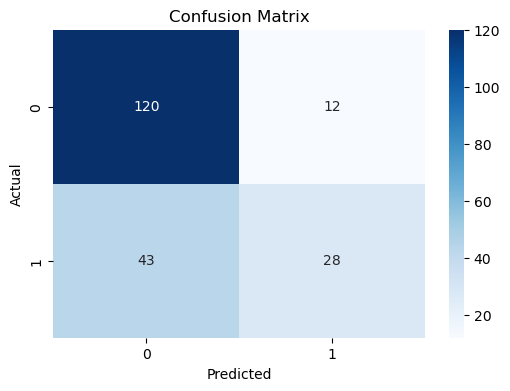

Outcome values:
 120 12 43 28
Classification report:
               precision    recall  f1-score   support

           1       0.74      0.91      0.81       132
           0       0.70      0.39      0.50        71

    accuracy                           0.73       203
   macro avg       0.72      0.65      0.66       203
weighted avg       0.72      0.73      0.71       203

Accuracy: 72.9 %
Precision: 73.6 %
Recall or Sensitivity: 90.9 %
Specificity: 39.4 %
F1 Score: 0.814
ROC AUC: 0.652


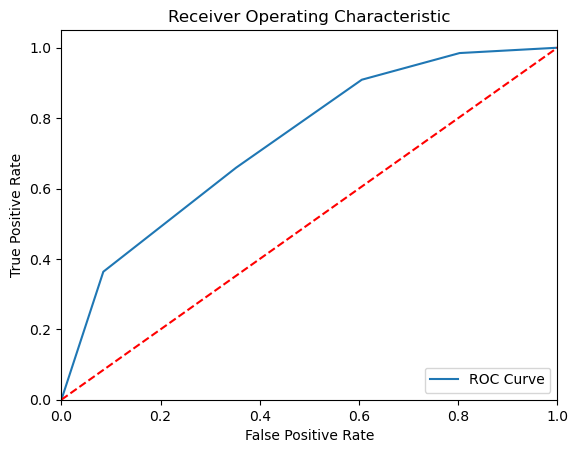

-----------------------------------------------------------------------------------------------------
Model Name: SVC
Confusion matrix:
 [[130   2]
 [ 44  27]]


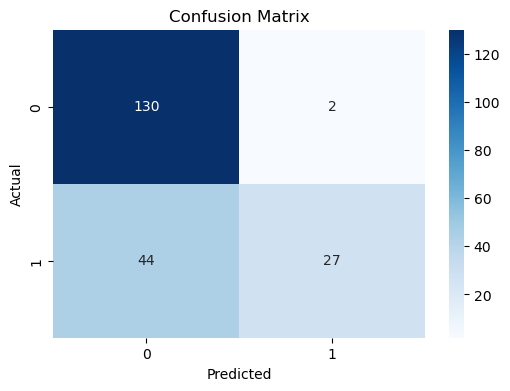

Outcome values:
 130 2 44 27
Classification report:
               precision    recall  f1-score   support

           1       0.75      0.98      0.85       132
           0       0.93      0.38      0.54        71

    accuracy                           0.77       203
   macro avg       0.84      0.68      0.69       203
weighted avg       0.81      0.77      0.74       203

Accuracy: 77.3 %
Precision: 74.7 %
Recall or Sensitivity: 98.5 %
Specificity: 38.0 %
F1 Score: 0.85
ROC AUC: 0.683


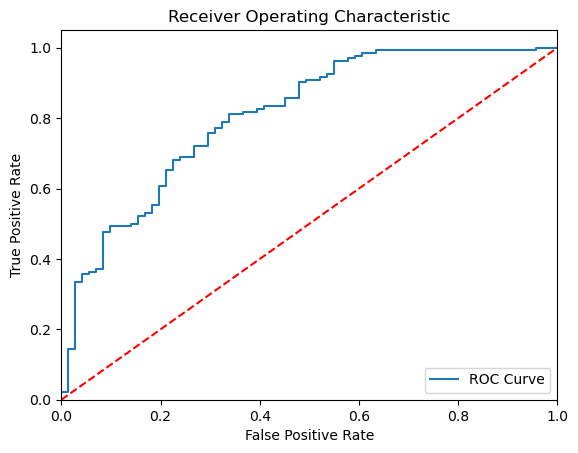

-----------------------------------------------------------------------------------------------------
Model Name: GradientBoostingClassifier
Confusion matrix:
 [[117  15]
 [ 35  36]]


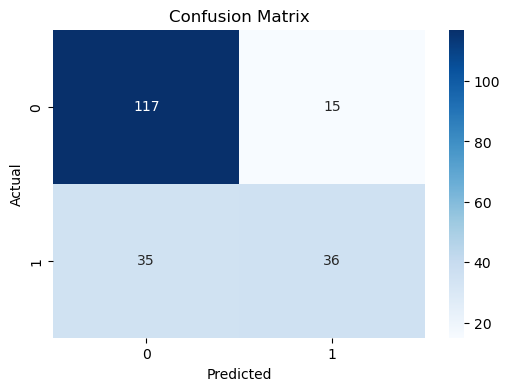

Outcome values:
 117 15 35 36
Classification report:
               precision    recall  f1-score   support

           1       0.77      0.89      0.82       132
           0       0.71      0.51      0.59        71

    accuracy                           0.75       203
   macro avg       0.74      0.70      0.71       203
weighted avg       0.75      0.75      0.74       203

Accuracy: 75.4 %
Precision: 77.0 %
Recall or Sensitivity: 88.6 %
Specificity: 50.7 %
F1 Score: 0.824
ROC AUC: 0.697


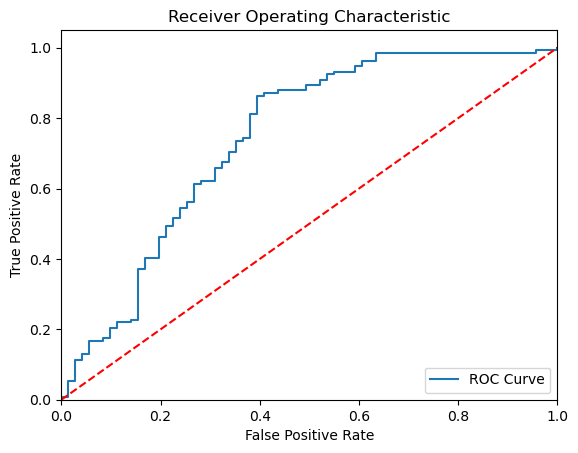

-----------------------------------------------------------------------------------------------------
Model Name: ExtraTreesClassifier
Confusion matrix:
 [[118  14]
 [ 29  42]]


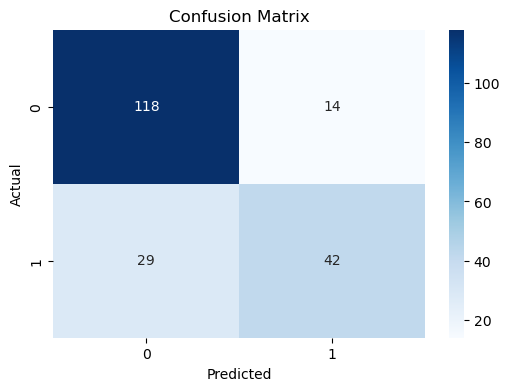

Outcome values:
 118 14 29 42
Classification report:
               precision    recall  f1-score   support

           1       0.80      0.89      0.85       132
           0       0.75      0.59      0.66        71

    accuracy                           0.79       203
   macro avg       0.78      0.74      0.75       203
weighted avg       0.78      0.79      0.78       203

Accuracy: 78.8 %
Precision: 80.3 %
Recall or Sensitivity: 89.4 %
Specificity: 59.2 %
F1 Score: 0.846
ROC AUC: 0.743


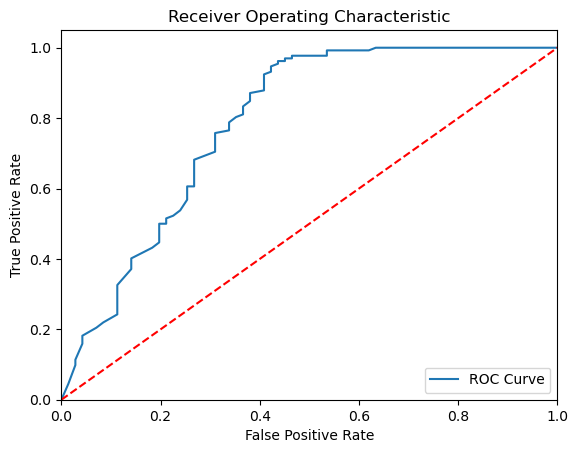

-----------------------------------------------------------------------------------------------------


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRFC = RandomForestClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)  # Set probability=True for SVC
ModelGB = GradientBoostingClassifier()
ModelET = ExtraTreesClassifier()

MM = [ModelLR, ModelDC, ModelRFC, ModelGNB, ModelKNN, ModelSVM, ModelGB, ModelET]
Results = pd.DataFrame(columns=['Model Name', 'True_Positive', 'False_Negative', 'False_Positive', 'True_Negative',
                               'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'ROC AUC'])

for model in MM:
    try:
        # Fit the model with training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate confusion matrix
        from sklearn.metrics import confusion_matrix, classification_report

        # Actual values
        actual = y_test

        # Predicted values
        predicted = y_pred

        # Confusion matrix
        matrix = confusion_matrix(actual, predicted, labels=[1, 0])
        print('Model Name:', model.__class__.__name__)
        print('Confusion matrix:\n', matrix)

        # Plotting confusion matrix as a heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # Outcome values order in sklearn
        TP, FN, FP, TN = confusion_matrix(actual, predicted, labels=[1, 0]).reshape(-1)
        print('Outcome values:\n', TP, FN, FP, TN)

        # Classification report for precision, recall, F1-score, and accuracy
        C_Report = classification_report(actual, predicted, labels=[1, 0])
        print('Classification report:\n', C_Report)

        # Calculating the metrics
        sensitivity = round(TP / (TP + FN), 3)
        specificity = round(TN / (TN + FP), 3)
        accuracy = round((TP + TN) / (TP + FP + TN + FN), 3)
        precision = round(TP / (TP + FP), 3)
        f1Score = round((2 * TP / (2 * TP + FP + FN)), 3)
        
        from sklearn.metrics import roc_curve, roc_auc_score
        # Calculate ROC AUC score
        roc_auc = round(roc_auc_score(actual, predicted), 3)
        
        print('Accuracy:', round(accuracy * 100, 2), '%')
        print('Precision:', round(precision * 100, 2), '%')
        print('Recall or Sensitivity:', round(sensitivity * 100, 2), '%')
        print('Specificity:', round(specificity * 100, 2), '%')
        print('F1 Score:', f1Score)
        print('ROC AUC:', roc_auc)

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label='ROC Curve')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
        print('-----------------------------------------------------------------------------------------------------')

        new_row = {'Model Name': model.__class__.__name__,
                   'True_Positive': TP,
                   'False_Negative': FN,
                   'False_Positive': FP,
                   'True_Negative': TN,
                   'Accuracy': accuracy,
                   'Precision': precision,
                   'Recall': sensitivity,
                   'F1 Score': f1Score,
                   'Specificity': specificity,
                   'ROC AUC': roc_auc}
        Results = Results.append(new_row, ignore_index=True)
    except Exception as e:
        print(f"Error occurred for {model.__class__.__name__}: {str(e)}")

In [31]:
 Results.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC AUC
0,LogisticRegression,128,4,44,27,0.764,0.744,0.970,0.842,0.380,0.675
1,DecisionTreeClassifier,98,34,27,44,0.700,0.784,0.742,0.763,0.620,0.681
2,RandomForestClassifier,121,11,29,42,0.803,0.807,0.917,0.858,0.592,0.754
3,GaussianNB,127,5,43,28,0.764,0.747,0.962,0.841,0.394,0.678
4,KNeighborsClassifier,120,12,43,28,0.729,0.736,0.909,0.814,0.394,0.652
5,SVC,130,2,44,27,0.773,0.747,0.985,0.850,0.380,0.683
6,GradientBoostingClassifier,117,15,35,36,0.754,0.770,0.886,0.824,0.507,0.697
7,ExtraTreesClassifier,118,14,29,42,0.788,0.803,0.894,0.846,0.592,0.743


In [32]:
# Hyperparametr tuning
from sklearn.model_selection import RandomizedSearchCV


LR_random_grid =  {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [10, 50, 100, 150]
}


RFC_random_grid = {
    'n_estimators': [1, 10, 50, 80, 100],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}
SVM_random_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

ET_random_grid = {
    'n_estimators': list(range(1, 100, 20)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': list(range(10, 100, 10)),
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['entropy', 'gini']
}


Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10, 'C': 0.1}
Confusion matrix:
 [[129   3]
 [ 44  27]]


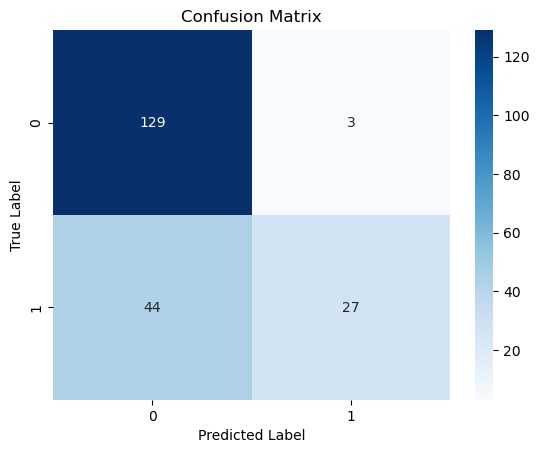

Outcome values:
 129 3 44 27
Classification report:
               precision    recall  f1-score   support

           1       0.75      0.98      0.85       132
           0       0.90      0.38      0.53        71

    accuracy                           0.77       203
   macro avg       0.82      0.68      0.69       203
weighted avg       0.80      0.77      0.74       203

Accuracy: 76.8 %
Precision: 74.6 %
Recall or Sensitivity: 97.7 %
Specificity: 38.0 %
F1 Score: 0.846
ROC AUC: 0.679


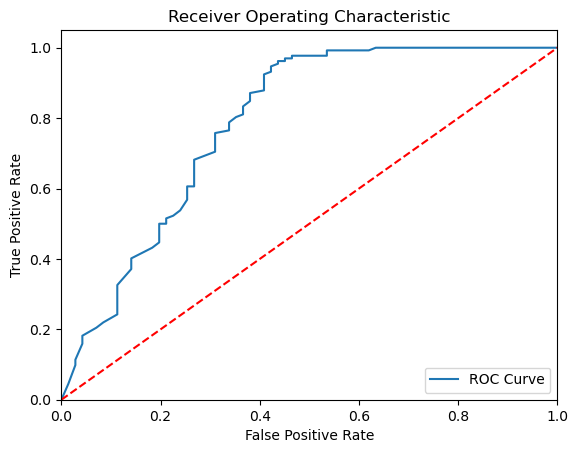

-----------------------------------------------------------------------------------------------------


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

ModelLR = LogisticRegression()

# Perform hyperparameter tuning using RandomizedSearchCV for LogisticRegression 
ModelLR_randomcv = RandomizedSearchCV(estimator=ModelLR, param_distributions=LR_random_grid, n_iter=100, cv=10, verbose=2, random_state=100, n_jobs=-1)
ModelLR_randomcv.fit(X_train, y_train)

print('Best Parameters for LogisticRegression:', ModelLR_randomcv.best_params_)

# Make predictions on the test data
y_pred = ModelLR_randomcv.predict(X_test)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[1, 0])
print('Confusion matrix:\n', matrix)

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Outcome values order in sklearn
TP, FN, FP, TN = confusion_matrix(actual, predicted, labels=[1, 0]).reshape(-1)
print('Outcome values:\n', TP, FN, FP, TN)

# Classification report for precision, recall, F1-score, and accuracy
C_Report = classification_report(actual, predicted, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(TP / (TP + FN), 3)
specificity = round(TN / (TN + FP), 3)
accuracy = round((TP + TN) / (TP + FP + TN + FN), 3)
precision = round(TP / (TP + FP), 3)
f1Score = round((2 * TP / (2 * TP + FP + FN)), 3)

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC AUC score
roc_auc = round(roc_auc_score(actual, predicted), 3)
        
print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall or Sensitivity:', round(sensitivity * 100, 2), '%')
print('Specificity:', round(specificity * 100, 2), '%')
print('F1 Score:', f1Score)
print('ROC AUC:', roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')


new_row = {'Model Name': 'LogisticRegression(Tuned)',
           'True_Positive': TP,
           'False_Negative': FN,
           'False_Positive': FP,
           'True_Negative': TN,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'ROC AUC': roc_auc
          }
Results = Results.append(new_row, ignore_index=True)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10, 'C': 0.1}
Confusion matrix:
 [[120  12]
 [ 28  43]]


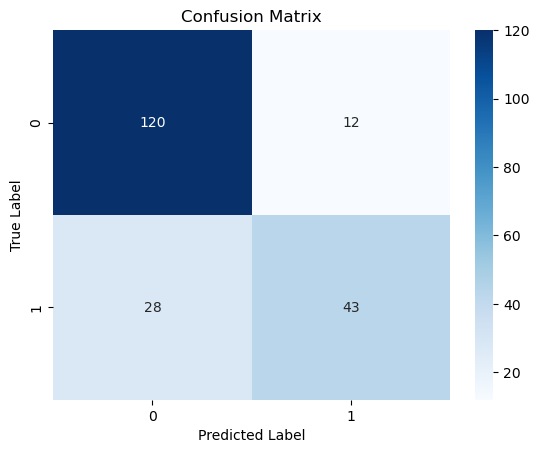

Outcome values:
 120 12 28 43
Classification report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86       132
           0       0.78      0.61      0.68        71

    accuracy                           0.80       203
   macro avg       0.80      0.76      0.77       203
weighted avg       0.80      0.80      0.80       203

Accuracy: 80.3 %
Precision: 81.1 %
Recall or Sensitivity: 90.9 %
Specificity: 60.6 %
F1 Score: 0.857
ROC AUC: 0.757


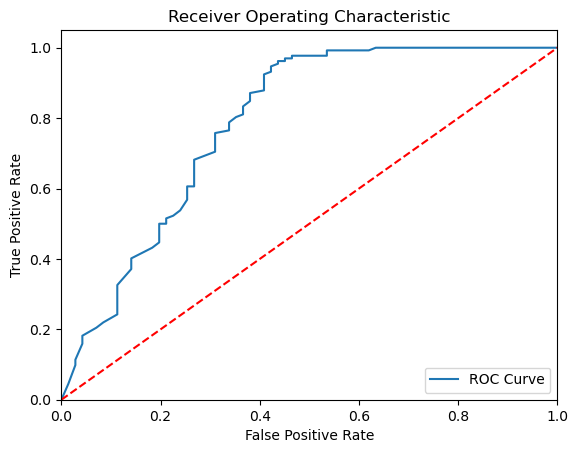

-----------------------------------------------------------------------------------------------------


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

ModelRFC = RandomForestClassifier()

# Perform hyperparameter tuning using RandomizedSearchCV for LogisticRegression 
ModelRFC_randomcv = RandomizedSearchCV(estimator=ModelRFC, param_distributions=RFC_random_grid, n_iter=100, cv=10, verbose=2, random_state=100, n_jobs=-1)
ModelRFC_randomcv.fit(X_train, y_train)

print('Best Parameters for LogisticRegression:', ModelLR_randomcv.best_params_)

# Make predictions on the test data
y_pred = ModelRFC_randomcv.predict(X_test)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[1, 0])
print('Confusion matrix:\n', matrix)

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Outcome values order in sklearn
TP, FN, FP, TN = confusion_matrix(actual, predicted, labels=[1, 0]).reshape(-1)
print('Outcome values:\n', TP, FN, FP, TN)

# Classification report for precision, recall, F1-score, and accuracy
C_Report = classification_report(actual, predicted, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(TP / (TP + FN), 3)
specificity = round(TN / (TN + FP), 3)
accuracy = round((TP + TN) / (TP + FP + TN + FN), 3)
precision = round(TP / (TP + FP), 3)
f1Score = round((2 * TP / (2 * TP + FP + FN)), 3)

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC AUC score
roc_auc = round(roc_auc_score(actual, predicted), 3)
        
print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall or Sensitivity:', round(sensitivity * 100, 2), '%')
print('Specificity:', round(specificity * 100, 2), '%')
print('F1 Score:', f1Score)
print('ROC AUC:', roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

new_row = {'Model Name': 'RandomForestClassifier(Tuned)',
           'True_Positive': TP,
           'False_Negative': FN,
           'False_Positive': FP,
           'True_Negative': TN,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'ROC AUC': roc_auc
          }
Results = Results.append(new_row, ignore_index=True)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Parameters for SVC: {'gamma': 'auto', 'C': 1}
Confusion matrix:
 [[130   2]
 [ 45  26]]


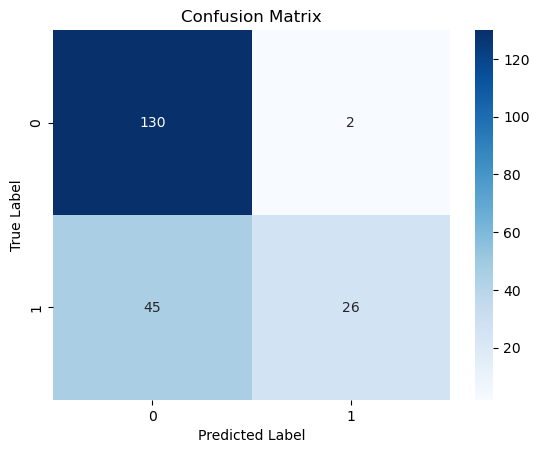

Outcome values:
 130 2 45 26
Classification report:
               precision    recall  f1-score   support

           1       0.74      0.98      0.85       132
           0       0.93      0.37      0.53        71

    accuracy                           0.77       203
   macro avg       0.84      0.68      0.69       203
weighted avg       0.81      0.77      0.73       203

Accuracy: 76.8 %
Precision: 74.3 %
Recall or Sensitivity: 98.5 %
Specificity: 36.6 %
F1 Score: 0.847
ROC AUC: 0.676


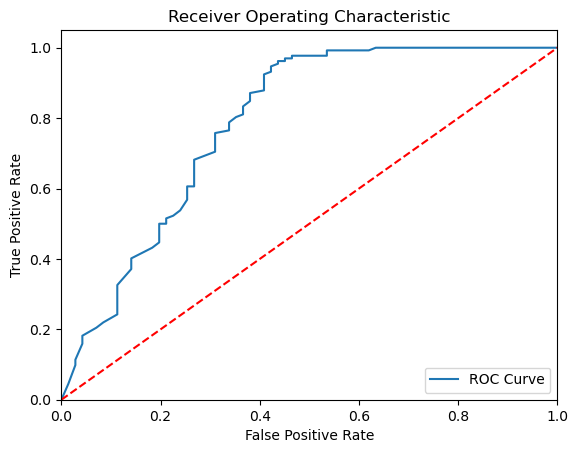

-----------------------------------------------------------------------------------------------------


In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

ModelSVM = SVC()

# Perform hyperparameter tuning using RandomizedSearchCV for ExtraTreesClassifier
ModelSVM_randomcv = RandomizedSearchCV(estimator=ModelSVM, param_distributions=SVM_random_grid, n_iter=100, cv=10, verbose=2, random_state=100, n_jobs=-1)
ModelSVM_randomcv.fit(X_train, y_train)

print('Best Parameters for SVC:', ModelSVM_randomcv.best_params_)

# Make predictions on the test data
y_pred = ModelSVM_randomcv.predict(X_test)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[1, 0])
print('Confusion matrix:\n', matrix)

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Outcome values order in sklearn
TP, FN, FP, TN = confusion_matrix(actual, predicted, labels=[1, 0]).reshape(-1)
print('Outcome values:\n', TP, FN, FP, TN)

# Classification report for precision, recall, F1-score, and accuracy
C_Report = classification_report(actual, predicted, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(TP / (TP + FN), 3)
specificity = round(TN / (TN + FP), 3)
accuracy = round((TP + TN) / (TP + FP + TN + FN), 3)
precision = round(TP / (TP + FP), 3)
f1Score = round((2 * TP / (2 * TP + FP + FN)), 3)

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC AUC score
roc_auc = round(roc_auc_score(actual, predicted), 3)
        
print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall or Sensitivity:', round(sensitivity * 100, 2), '%')
print('Specificity:', round(specificity * 100, 2), '%')
print('F1 Score:', f1Score)
print('ROC AUC:', roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

new_row = {'Model Name': 'SVM(Tuned)',
           'True_Positive': TP,
           'False_Negative': FN,
           'False_Positive': FP,
           'True_Negative': TN,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'ROC AUC': roc_auc
          }
Results = Results.append(new_row, ignore_index=True)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters for  ExtraTreesClassifier: {'n_estimators': 61, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'gini'}
Confusion matrix:
 [[115  17]
 [ 29  42]]


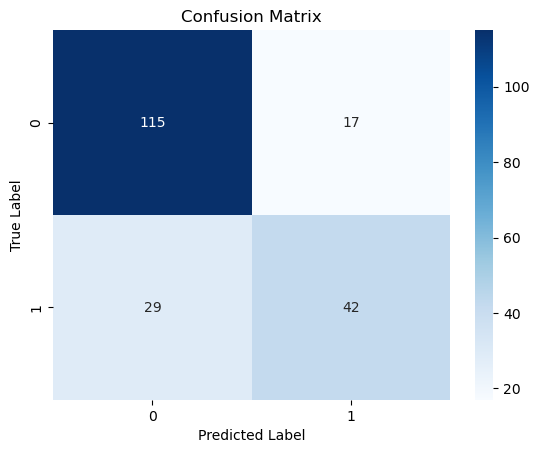

Outcome values:
 115 17 29 42
Classification report:
               precision    recall  f1-score   support

           1       0.80      0.87      0.83       132
           0       0.71      0.59      0.65        71

    accuracy                           0.77       203
   macro avg       0.76      0.73      0.74       203
weighted avg       0.77      0.77      0.77       203

Accuracy: 77.3 %
Precision: 79.9 %
Recall or Sensitivity: 87.1 %
Specificity: 59.2 %
F1 Score: 0.833
ROC AUC: 0.731


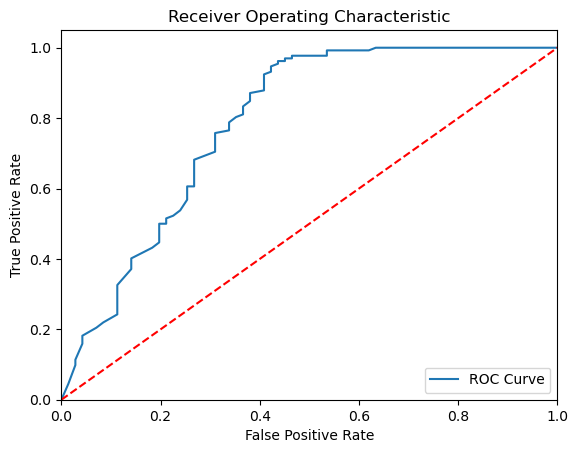

-----------------------------------------------------------------------------------------------------


In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

ModelET = ExtraTreesClassifier()

# Perform hyperparameter tuning using RandomizedSearchCV for ExtraTreesClassifier
ModelET_randomcv = RandomizedSearchCV(estimator=ModelET, param_distributions=ET_random_grid, n_iter=100, cv=10, verbose=2, random_state=100, n_jobs=-1)
ModelET_randomcv.fit(X_train, y_train)

print('Best Parameters for  ExtraTreesClassifier:', ModelET_randomcv.best_params_)

# Make predictions on the test data
y_pred = ModelET_randomcv.predict(X_test)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[1, 0])
print('Confusion matrix:\n', matrix)

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Outcome values order in sklearn
TP, FN, FP, TN = confusion_matrix(actual, predicted, labels=[1, 0]).reshape(-1)
print('Outcome values:\n', TP, FN, FP, TN)

# Classification report for precision, recall, F1-score, and accuracy
C_Report = classification_report(actual, predicted, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(TP / (TP + FN), 3)
specificity = round(TN / (TN + FP), 3)
accuracy = round((TP + TN) / (TP + FP + TN + FN), 3)
precision = round(TP / (TP + FP), 3)
f1Score = round((2 * TP / (2 * TP + FP + FN)), 3)

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC AUC score
roc_auc = round(roc_auc_score(actual, predicted), 3)
        
print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall or Sensitivity:', round(sensitivity * 100, 2), '%')
print('Specificity:', round(specificity * 100, 2), '%')
print('F1 Score:', f1Score)
print('ROC AUC:', roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

new_row = {'Model Name':'ExtraTreesClassifier(Tuned)',
           'True_Positive': TP,
           'False_Negative': FN,
           'False_Positive': FP,
           'True_Negative': TN,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'ROC AUC': roc_auc
          }
Results = Results.append(new_row, ignore_index=True)


In [37]:
Results.head(15)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,ROC AUC
0,LogisticRegression,128,4,44,27,0.764,0.744,0.970,0.842,0.380,0.675
1,DecisionTreeClassifier,98,34,27,44,0.700,0.784,0.742,0.763,0.620,0.681
2,RandomForestClassifier,121,11,29,42,0.803,0.807,0.917,0.858,0.592,0.754
3,GaussianNB,127,5,43,28,0.764,0.747,0.962,0.841,0.394,0.678
4,KNeighborsClassifier,120,12,43,28,0.729,0.736,0.909,0.814,0.394,0.652
5,SVC,130,2,44,27,0.773,0.747,0.985,0.850,0.380,0.683
6,GradientBoostingClassifier,117,15,35,36,0.754,0.770,0.886,0.824,0.507,0.697
7,ExtraTreesClassifier,118,14,29,42,0.788,0.803,0.894,0.846,0.592,0.743
8,LogisticRegression(Tuned),129,3,44,27,0.768,0.746,0.977,0.846,0.380,0.679
9,RandomForestClassifier(Tuned),120,12,28,43,0.803,0.811,0.909,0.857,0.606,0.757


In [38]:
# Fit the model with training data
print(data_BK)

ModelET.fit(X_train, y_train)

# Predict on test data
y_pred = ModelET.predict(X_test)
PredResults = pd.DataFrame({'Claim_Actual': y_test, 'Claim_Predicted': y_pred})

# Merge two DataFrames on index
Results = data_BK.merge(PredResults, left_index=True, right_index=True)

# Display 15 randomly selected records in a single row
Results.sample(15)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Claim_Actual,Claim_Predicted
241,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N,0,1
268,LP001883,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,N,0,1
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y,1,1
229,LP001761,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y,1,1
76,LP001256,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,N,0,1
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y,1,1
203,LP001688,Male,Yes,1,Not Graduate,No,3500,1083.0,135.0,360.0,1.0,Urban,Y,1,1
276,LP001903,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y,1,1
397,LP002281,Male,Yes,0,Graduate,No,3033,1459.0,95.0,360.0,1.0,Urban,Y,1,1
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,Y,1,1


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

ModelET  = ExtraTreesClassifier(n_estimators=270,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features='sqrt',
                          max_depth=5)

ModelET.fit(X, y)


ExtraTreesClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                     n_estimators=270)

In [40]:
import joblib
joblib.dump(ModelET , 'Loan_Status_Predict')

['Loan_Status_Predict']

In [41]:
model = joblib.load('Loan_Status_Predict')

In [42]:
import pandas as pd
df = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [2889],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [45],
    'Loan_Amount_Term': [180],
    'Credit_History': [0],
    'Property_Area': [1]
})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [43]:
result = model.predict(df)

In [44]:
if result == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [45]:
from tkinter import *
import joblib
import pandas as pd

In [ ]:
def Show_Entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('Loan_Status_Predict')
    df = pd.DataFrame({
    'Gender': p1,
    'Married': p2,
    'Dependents':p3,
    'Education': p4,
    'Self_Employed': p5,
    'ApplicantIncome': p6,
    'CoapplicantIncome': p7,
    'LoanAmount': p8,
    'Loan_Amount_Term':p9,
    'Credit_History': p10,
    'Property_Area':p11
    }, index=[0])
    result = model.predict(df)
    if result == 1:
        Label(master, text = "Loan Approved").grid(row = 31)
    else:
        Label(master, text = "Loan Not Approved").grid(row = 31)
master = Tk()
master.geometry("400x400")
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master, text="Loan Status Prediction", bg="black", fg="white")
label.grid(row=0, columnspan=2, sticky="w")

Label(master, text="Gender [1: Male, 0: Female]").grid(row=1, sticky="w")
Label(master, text="Married [1: Yes, 0: No]").grid(row=2, sticky="w")
Label(master, text="Dependents [1, 2, 3, 4]").grid(row=3, sticky="w")
Label(master, text="Education [0: Not Graduate, 1: Graduate]").grid(row=4, sticky="w")
Label(master, text="Self_Employed [1: Yes, 0: No]").grid(row=5, sticky="w")
Label(master, text="ApplicantIncome").grid(row=6, sticky="w")
Label(master, text="CoapplicantIncome").grid(row=7, sticky="w")
Label(master, text="LoanAmount").grid(row=8, sticky="w")
Label(master, text="Loan_Amount_Term").grid(row=9, sticky="w")
Label(master, text="Credit_History [1: Good, 0: Bad]").grid(row=10, sticky="w")
Label(master, text="Property_Area [0: Rural, 1: Semiurban, 2: Urban]").grid(row=11, sticky="w")

e1 = Entry(master, justify="left")
e2 = Entry(master, justify="left")
e3 = Entry(master, justify="left")
e4 = Entry(master, justify="left")
e5 = Entry(master, justify="left")
e6 = Entry(master, justify="left")
e7 = Entry(master, justify="left")
e8 = Entry(master, justify="left")
e9 = Entry(master, justify="left")
e10 = Entry(master, justify="left")
e11 = Entry(master, justify="left")

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

Button(master, text="Predict", command=Show_Entry).grid()

mainloop()